In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/CO2 Emissions_Canada.csv
/kaggle/input/Data Description.csv


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importing all the metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

In [17]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [18]:
np.random.seed(4)

In [19]:
import os 
os.chdir('/kaggle/input/')

In [20]:
data_description = pd.read_csv('Data Description.csv')
df = pd.read_csv('CO2 Emissions_Canada.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [21]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [22]:
df['Model'].value_counts()

Model
F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: count, Length: 2053, dtype: int64

In [23]:
df3 = df.copy()
le1, le2, le3, le4, le5 = LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()
df3['Model'] = le1.fit_transform(df3['Model'])
df3['Make'] = le2.fit_transform(df3['Make'])
df3['Vehicle Class'] = le3.fit_transform(df3['Vehicle Class'])
df3['Transmission'] = le4.fit_transform(df3['Transmission'])
df3['Fuel Type'] = le5.fit_transform(df3['Fuel Type'])
df3

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


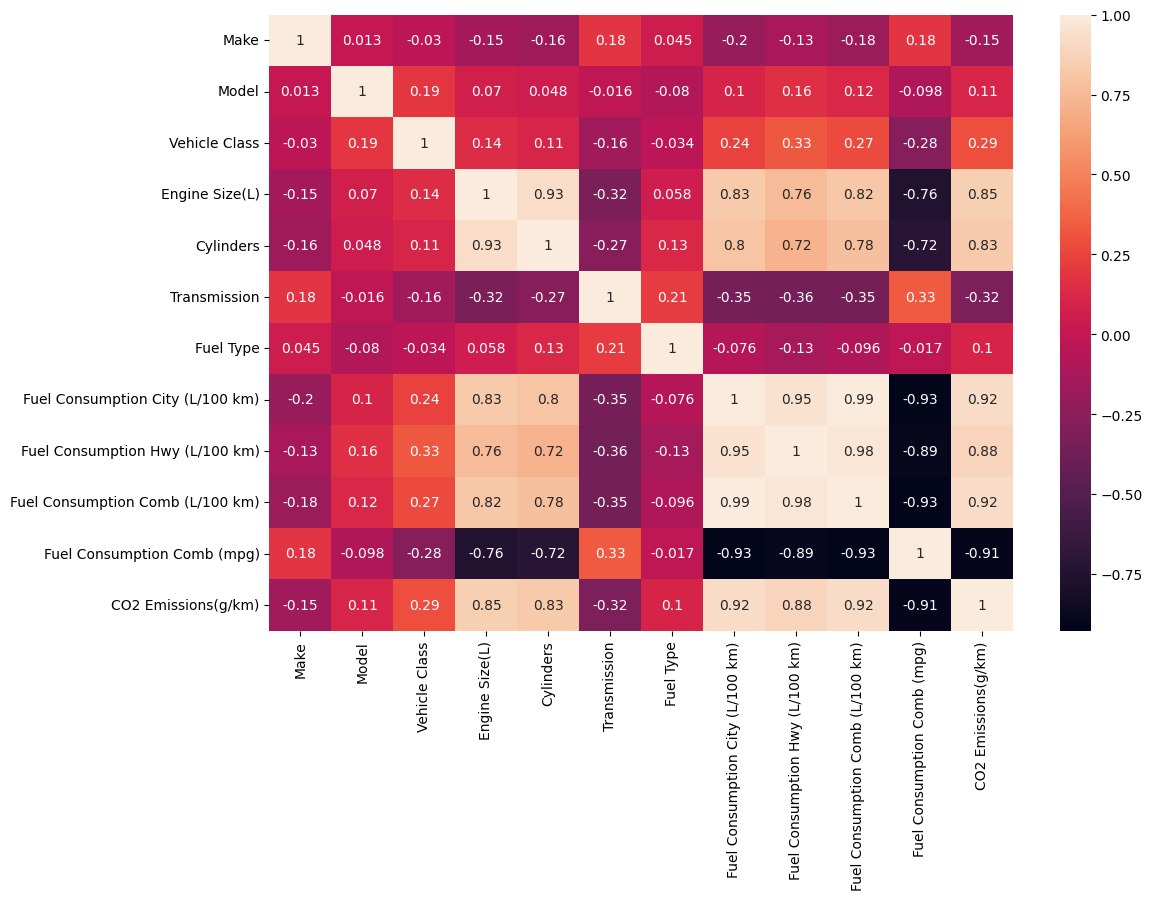

In [24]:
plt.figure(figsize = (12,8))
sns.heatmap(df3.corr(), annot=True)
plt.show()

In [25]:
columns_to_encode = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type', 'Engine Size(L)', 'Cylinders']
numerical_cols = ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 
                  'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']
def preprocess_df(df, columns_to_encode, numerical_cols, label_cols):
    df2 = df.copy()
    sc = MinMaxScaler()
    
    for i in label_cols:
        le = LabelEncoder()
        df2['Model'] = le.fit_transform(df2['Model'])
        
    data_to_encode = df2[columns_to_encode]
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap
    encoded_data = encoder.fit_transform(data_to_encode)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
    df2 = pd.concat([df2.drop(columns=columns_to_encode), encoded_df], axis=1)
    df2[numerical_cols] = sc.fit_transform(df2[numerical_cols])
    
    return df2

In [26]:
df3 = df.copy()

In [27]:
df4 = preprocess_df(df, columns_to_encode, numerical_cols, ['Model'])
df = df4

In [28]:
X=df.drop('CO2 Emissions(g/km)', axis=1)
y=df['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
X_cat=df3.drop('CO2 Emissions(g/km)', axis=1)
y_cat=df3['CO2 Emissions(g/km)']

In [30]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2)

In [31]:
df = df3.copy()

In [32]:
def get_unique_values(df):
    
    output_data = []

    for col in df.columns:
        if df.loc[:, col].nunique() <= 10:
            unique_values = df.loc[:, col].unique()
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Make,42,-,object
1,Model,2053,-,object
2,Vehicle Class,16,-,object
3,Engine Size(L),51,-,float64
4,Cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,Transmission,27,-,object
6,Fuel Type,5,"[Z, D, X, E, N]",object
7,Fuel Consumption City (L/100 km),211,-,float64
8,Fuel Consumption Hwy (L/100 km),143,-,float64
9,Fuel Consumption Comb (L/100 km),181,-,float64


In [33]:
# sns.pairplot(df, hue='CO2 Emissions(g/km)')

In [34]:
df_Make=df['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})[0:25]
df_Make

,Count,count
0,FORD,628
1,CHEVROLET,588
2,BMW,527
3,MERCEDES-BENZ,419
4,PORSCHE,376
5,TOYOTA,330
6,GMC,328
7,AUDI,286
8,NISSAN,259
9,JEEP,251


In [35]:
len(df['Make'].unique())

42

In [36]:
make = df['Make'].unique()
vehicle_class = df['Vehicle Class'].unique()
make_emissions=[]
vehicle_class_emissions=[]
for i in make:
    df2 = df[df['Make']==i]
    make_emissions.append(round(df2['CO2 Emissions(g/km)'].mean(),2))
    
for i in vehicle_class:
    df2 = df[df['Vehicle Class']==i]
    vehicle_class_emissions.append(round(df2['CO2 Emissions(g/km)'].mean(),2))

In [37]:
fig = go.Figure(go.Bar(
    x=vehicle_class,y=vehicle_class_emissions,
    marker={'color': vehicle_class_emissions, 
    'colorscale': 'Viridis'},  
    text= vehicle_class_emissions,
    textposition = "outside",
))
fig.update_layout(title_text='CO2 vs Vehicle Class',xaxis_title="Vehicle Class",yaxis_title="Total CO2 Emissions ",title_x=0.5)
fig.update_xaxes(tickangle=45)
fig.show()

In [38]:
fig = go.Figure(go.Bar(
    x=make[:25],y=make_emissions[:25],
    marker={'color': make_emissions[:25], 
    'colorscale': 'Viridis'},  
    text= make_emissions[:25],
    textposition = "outside",
))
fig.update_layout(title_text='CO2 vs Brands',xaxis_title="Brands",yaxis_title="Total CO2 Emissions ",title_x=0.5)
fig.update_xaxes(tickangle=45)
fig.show()

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

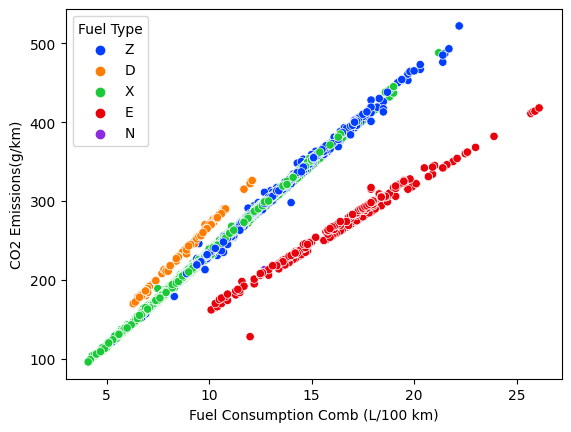

In [39]:
sns.set_palette('bright')
sns.scatterplot(y = 'CO2 Emissions(g/km)', x = 'Fuel Consumption Comb (L/100 km)', data = df, hue = 'Fuel Type')

In [40]:
df.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [41]:
# Only for running the notebook on Kaggle
import os
os.chdir('/kaggle/working/')

In [42]:
from catboost import CatBoostRegressor

In [43]:
cat_model = CatBoostRegressor(random_seed = 2)
cat_model.fit(X_train_cat, y_train_cat, cat_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], verbose=200)

Learning rate set to 0.054208
0:	learn: 55.9837144	total: 72.7ms	remaining: 1m 12s
200:	learn: 3.3270842	total: 1.84s	remaining: 7.3s
400:	learn: 2.8158972	total: 3.18s	remaining: 4.75s
600:	learn: 2.5054452	total: 4.49s	remaining: 2.98s
800:	learn: 2.3094693	total: 5.8s	remaining: 1.44s
999:	learn: 2.1648895	total: 7.13s	remaining: 0us


In [44]:
y_preds_cat = cat_model.predict(X_test_cat)
cat_mse = mean_squared_error(y_test_cat, y_preds_cat)

In [45]:
r2_score(y_test_cat,y_preds_cat)

0.9977573932683833

In [46]:
y_train_cat_preds = cat_model.predict(X_train_cat)

In [47]:
r2_score(y_train_cat, y_train_cat_preds)

0.9984594308445589

In [48]:
mae(y_train_cat, y_train_cat_preds)

1.7315357267534686

In [49]:
mae(y_test_cat, y_preds_cat)

2.047548328809626

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



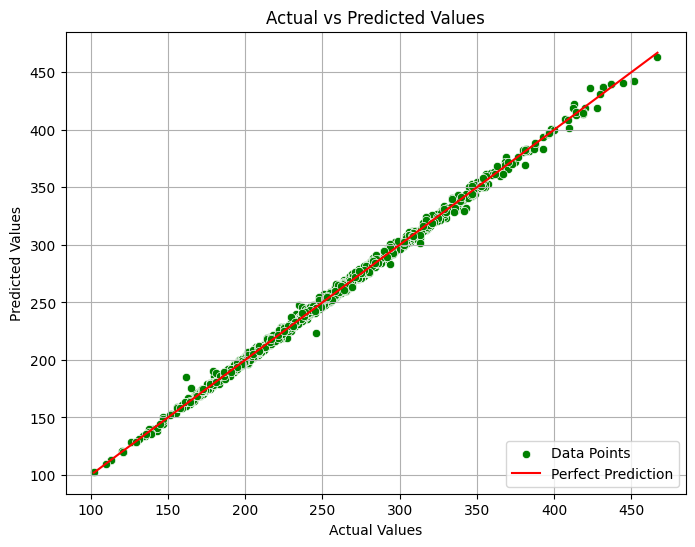

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cat, y=y_preds_cat, color='green', label='Data Points')
sns.lineplot(x=y_test_cat, y=y_test_cat, color='red', label='Perfect Prediction')  # Plotting the diagonal line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
linear_preds = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, linear_preds)

In [54]:
lr.score(X_test, y_test)

0.9933693322120905

In [55]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
rf_preds = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)

In [57]:
from xgboost import XGBRegressor

In [58]:
xgb = XGBRegressor(random_seed = 2)
xgb.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[22:29:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "random_seed" } are not used.




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_seed=2, ...)

In [59]:
xgb.score(X_train, y_train)

0.9990908307816717

In [60]:
xgb_preds = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_preds)

In [61]:
mses = [cat_mse, xgb_mse, rf_mse, lr_mse]
rmses = np.sqrt(mses)

In [62]:
scores = pd.DataFrame({'Models' : ['CatBoost Regressor', 'XGBoost Regressor', 'Random Forest Regressor', 'Linear Regression'], 'Mean Squared Error':mses, 'Root Mean Squared Errors':rmses})
scores.head()

,Models,Mean Squared Error,Root Mean Squared Errors
0,CatBoost Regressor,7.603822,2.757503
1,XGBoost Regressor,12.034186,3.469032
2,Random Forest Regressor,11.318351,3.364276
3,Linear Regression,22.692656,4.763681


In [63]:
import pickle
pickle.dump(cat_model, open('cat_model.pkl', 'wb'))